# DPMM Model criticism

Cluster sizes and Edward's PPC plots.

**Important**: restart the kernel when changing the experiment to evaluate

## Experiment to evaluate

In [4]:
EXPERIMENT_NAME = '30-Nov-2017@00-51-03-DPMM'

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
import os

import numpy as np
import edward as ed
import tensorflow as tf
import matplotlib.pyplot as plt

from neural_clustering.criticize import (plot, restore,
                                         store_cluster_assignments, ppc_plot)
from neural_clustering import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

logging.basicConfig(level=logging.INFO)

In [7]:
cfg = config.load('../config.yaml')

In [8]:
exp = restore.experiment(cfg, EXPERIMENT_NAME)
exp.keys()

InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [6,21] rhs shape= [15,21]
	 [[Node: save/Assign_1 = Assign[T=DT_FLOAT, _class=["loc:@Variable_1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_1, save/RestoreV2_1)]]

Caused by op 'save/Assign_1', defined at:
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-071b1c32ad08>", line 1, in <module>
    exp = restore.experiment(cfg, EXPERIMENT_NAME)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/neural_clustering/criticize/restore.py", line 27, in experiment
    return restore_function(cfg, session_name)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/neural_clustering/criticize/restore.py", line 63, in dpmm
    saver = tf.train.Saver()
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1218, in __init__
    self.build()
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 751, in _build_internal
    restore_sequentially, reshape)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 439, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 160, in restore
    self.op.get_shape().is_fully_defined())
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 276, in assign
    validate_shape=validate_shape)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 57, in assign
    use_locking=use_locking, name=name)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/Edu/miniconda3/envs/test-project/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [6,21] rhs shape= [15,21]
	 [[Node: save/Assign_1 = Assign[T=DT_FLOAT, _class=["loc:@Variable_1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_1, save/RestoreV2_1)]]


In [5]:
x_pred = exp['x_pred']
x_train = exp['x_train']

## Get cluster ssignments

Find cluster assignments. Also save the assignments (this will later be used in notebook 5).

In [6]:
clusters = store_cluster_assignments(cfg, exp['x_train'], exp['qmu'], exp['params'])

INFO:neural_clustering.criticize.criticize:Cluster assignmens stored in /Users/Edu/data/neural-clustering-toy/sessions/28-Nov-2017@23-22-39-DPMM/clusters.npy


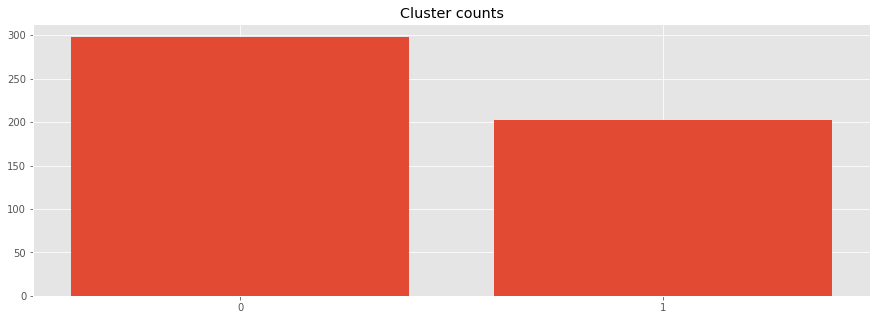

In [7]:
plot.cluster_counts(clusters)

## Log likelihood and mean squared error

Evaluate log likelihood and mean squared error.

In [8]:
log_lik = ed.evaluate('log_likelihood', data={x_pred: x_train})
mse = ed.evaluate('mean_squared_error', data={x_pred: x_train})
print(f'Log likelihood is: {log_lik:0.2f}')
print(f'Mean squared error is: {mse:0.2f}')

Log likelihood is: -8319.56
Mean squared error is: 27.32


## Posterior predictive checks

PPC plots for mean, max and min.

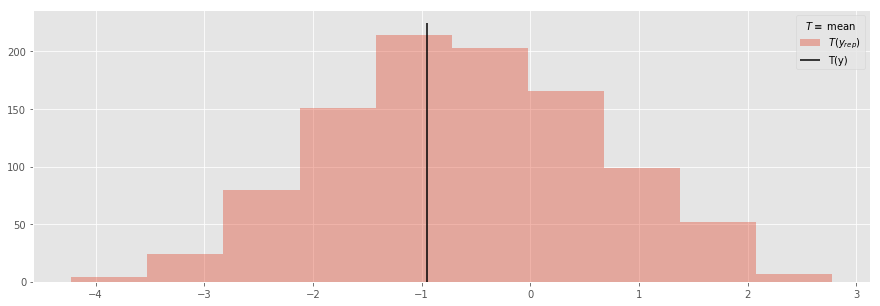

In [9]:
ppc_plot(lambda xs, mus: tf.reduce_mean(xs[x_pred]), 'mean', x_pred, x_train)

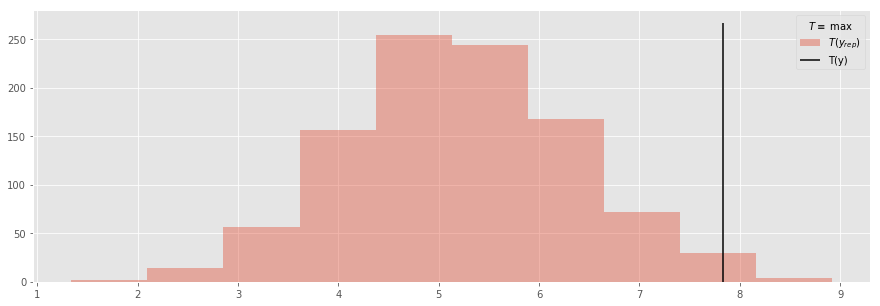

In [10]:
ppc_plot(lambda xs, mus: tf.reduce_max(xs[x_pred]), 'max', x_pred, x_train)

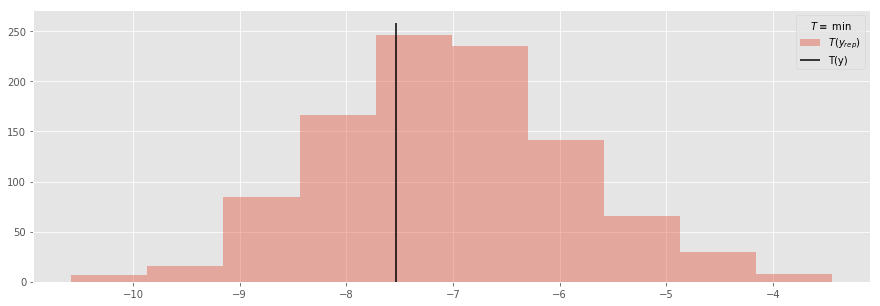

In [11]:
ppc_plot(lambda xs, mus: tf.reduce_min(xs[x_pred]), 'min', x_pred, x_train)